## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Leitura do conjunto de dados Boston Housing diretamente do URL
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Criação de uma cópia do conjunto de dados excluindo a coluna 'medv'
X = boston.drop(columns=['medv']).copy()

# Criação de um DataFrame contendo apenas a coluna 'medv'
y = boston[['medv']]

In [4]:
# Exibindo as cinco primeiras linhas do 'df' variáveis independentes
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
# Exibindo as cinco primeiras linhas do 'df' variáveis dependentes
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
# Exibe informações essenciais sobre o DataFrame boston.
# Isso inclui o número total de entradas, os tipos de dados de cada coluna
# e a quantidade de memória usada pelo DataFrame.
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# Divide o conjunto de dados em conjuntos de treinamento e teste.
# X_train e y_train contêm as variáveis independentes e dependentes para treinamento, respectivamente.
# X_test e y_test contêm as variáveis independentes e dependentes para teste, respectivamente.
# O parâmetro test_size=0.3 indica que 30% dos dados serão usados para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
# Cria um modelo de árvore de decisão para regressão com profundidade máxima de 8.
modelo = DecisionTreeRegressor(max_depth=8)

# Treina o modelo nos conjuntos de treinamento.
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [10]:
# Calcula o caminho do custo-complexidade para a poda da árvore de decisão.
path = modelo.cost_complexity_pruning_path(X_train, y_train)

# Exibe o caminho do custo-complexidade.
path

{'ccp_alphas': array([0.00000000e+00, 3.53107345e-04, 3.81355932e-04, 4.70809793e-04,
        6.92090395e-04, 9.03954802e-04, 9.03954802e-04, 1.41242938e-03,
        1.41242938e-03, 1.70903955e-03, 1.70903955e-03, 2.72128060e-03,
        2.76836158e-03, 3.05084746e-03, 3.17796610e-03, 3.22269303e-03,
        3.61581921e-03, 4.06779661e-03, 4.55743879e-03, 4.75141243e-03,
        5.44256121e-03, 5.93926554e-03, 6.10169492e-03, 7.23163842e-03,
        8.16384181e-03, 8.70527307e-03, 1.06906780e-02, 1.08474576e-02,
        1.12994350e-02, 1.17702448e-02, 1.22916667e-02, 1.39951574e-02,
        1.44632768e-02, 1.62170433e-02, 1.66563089e-02, 1.75188324e-02,
        2.14830508e-02, 2.50894539e-02, 2.53615819e-02, 2.69318895e-02,
        2.72128060e-02, 2.95419693e-02, 2.98641377e-02, 2.98870056e-02,
        3.08898305e-02, 3.16572505e-02, 3.80423729e-02, 4.22805819e-02,
        4.54825800e-02, 4.94938795e-02, 5.02740113e-02, 5.25564972e-02,
        6.11257786e-02, 6.85918185e-02, 7.24024751

Text(0, 0.5, 'Impureza total das folhas')

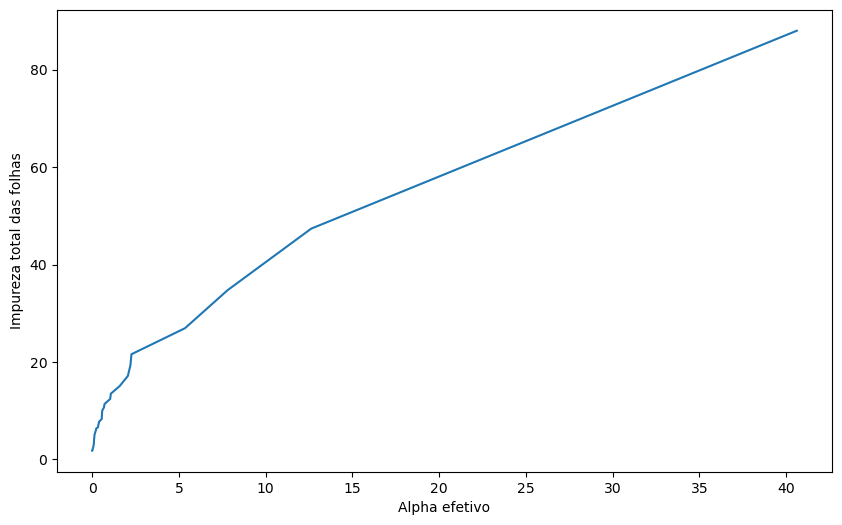

In [11]:
# Extração de ccp_alphas e impurities do caminho do custo-complexidade
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Criação de um gráfico para visualizar a relação entre Alpha efetivo e Impureza total das folhas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [12]:
# Inicialização de uma lista para armazenar os modelos
modelos = []

# Loop para criar modelos para cada valor de ccp_alpha
for ccp in ccp_alphas:
    # Criação do modelo de árvore de decisão com o ccp_alpha atual
    modelo = DecisionTreeRegressor(ccp_alpha=ccp)
    
    # Treinamento do modelo no conjunto de treinamento
    modelo.fit(X_train, y_train)
    
    # Adição do modelo à lista de modelos
    modelos.append(modelo)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [13]:
# Inicialização de uma lista para armazenar os valores de MSE para cada modelo
mses = []

# Loop para avaliar o desempenho de cada modelo no conjunto de teste
for modelo in modelos:
    # Fazendo previsões no conjunto de teste usando o modelo atual
    y_pred = modelo.predict(X_test)
    
    # Calculando o MSE para o modelo atual e adicionando à lista
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    
    # Imprimindo o valor de alpha e o MSE correspondente para cada modelo
    print(f"---Modelo com ALPHA {modelo.ccp_alpha} ||| MSE: {mse}")

---Modelo com ALPHA 0.0 ||| MSE: 15.79157894736842
---Modelo com ALPHA 0.0003531073446340529 ||| MSE: 14.006453307748538
---Modelo com ALPHA 0.0003813559322037656 ||| MSE: 14.752935398391813
---Modelo com ALPHA 0.0004708097928432629 ||| MSE: 14.099656962719298
---Modelo com ALPHA 0.0006920903954850561 ||| MSE: 14.7854747624269
---Modelo com ALPHA 0.0009039548022603093 ||| MSE: 13.216421399853802
---Modelo com ALPHA 0.0009039548022603495 ||| MSE: 14.44642322733918
---Modelo com ALPHA 0.0014124293785317157 ||| MSE: 14.42206239035088
---Modelo com ALPHA 0.0014124293785325185 ||| MSE: 14.33843802997076
---Modelo com ALPHA 0.0017090395480223292 ||| MSE: 13.354377357456139
---Modelo com ALPHA 0.0017090395480226504 ||| MSE: 13.220775840643274
---Modelo com ALPHA 0.0027212806026371108 ||| MSE: 15.485531908640645
---Modelo com ALPHA 0.0027683615819215977 ||| MSE: 14.485357421082469
---Modelo com ALPHA 0.0030508474576269934 ||| MSE: 13.428991191520467
---Modelo com ALPHA 0.0031779661016949155 ||

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

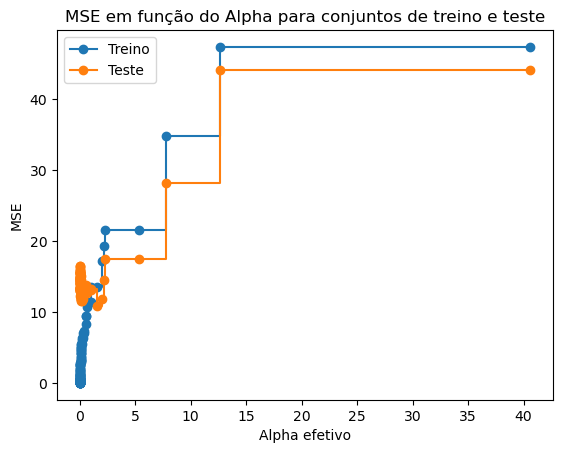

In [15]:
# Inicialização de listas para armazenar os valores de MSE para o conjunto de treino e teste
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in modelos]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in modelos]

# Criação da figura e eixos para o gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Alpha efetivo")
ax.set_ylabel("MSE")
ax.set_title("MSE em função do Alpha para conjuntos de treino e teste")

# Plotagem das curvas de MSE para os conjuntos de treino e teste
ax.plot(ccp_alphas, train_scores, marker='o', label="Treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Teste", drawstyle="steps-post")

# Adição de legenda ao gráfico
ax.legend()

# Exibição do gráfico
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [16]:
# Criação de uma nova árvore de decisão com o parâmetro de poda (ccp_alpha) igual a 0.6
nova_arvore = DecisionTreeRegressor(ccp_alpha=0.6)

# Treinamento da nova árvore com o conjunto de treinamento
nova_arvore.fit(X_train, y_train)

# Avaliação do desempenho da nova árvore no conjunto de teste usando o método score, que retorna o coeficiente de determinação R^2
score_teste = nova_arvore.score(X_test, y_test)

# Impressão do coeficiente de determinação R^2
print(score_teste)

0.816890733077564


### 7. Visualize esta árvore.

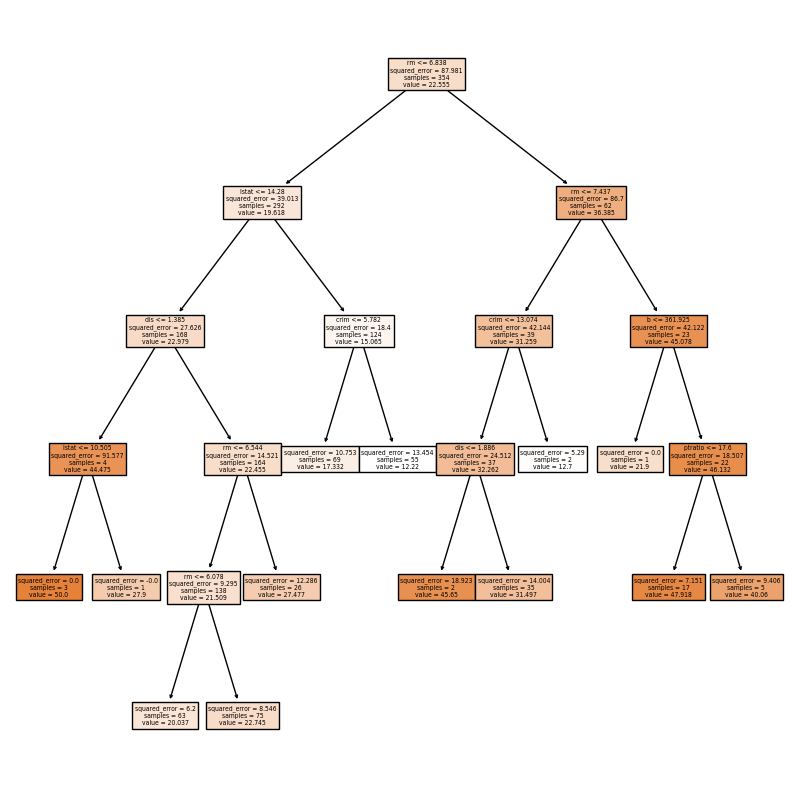

In [23]:
# Ajuste do tamanho padrão das figuras
plt.rc('figure', figsize=(10, 10))

# Plotagem da árvore de decisão
tp = tree.plot_tree(nova_arvore,
                    feature_names=X.columns.tolist(),  # Convertendo Index para lista
                    filled=True)